In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X, y = data.data, data.target

# Define the model
model = RandomForestClassifier()

# Define the K-Fold strategy (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get scores
scores = cross_val_score(model, X, y, cv=kf)

print(f"Scores per fold: {scores}")
print(f"Average Accuracy: {scores.mean():.2f}")

Scores per fold: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average Accuracy: 0.96


In [2]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# 1. Load data
X, y = load_iris(return_X_y=True)

# 2. Define the model and the "Grid" of parameters to try
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 3. Set up the K-Fold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=kf, 
                           scoring='accuracy',
                           n_jobs=-1) # Uses all your CPU cores

# 5. Run the search
grid_search.fit(X, y)

# 6. See the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9600


## Comparing Multiple Models with K-Fold Cross-Validation

Now let's compare different models to find which one performs best on the Iris dataset.

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load data
X, y = load_iris(return_X_y=True)

# Define K-Fold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define multiple models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Compare models
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = scores
    print(f"{name:25} | Mean: {scores.mean():.4f} | Std: {scores.std():.4f} | Scores: {scores}")

# Find the best model
best_model = max(results, key=lambda k: results[k].mean())
print(f"\n🏆 Best Model: {best_model} with accuracy: {results[best_model].mean():.4f}")

Logistic Regression       | Mean: 0.9733 | Std: 0.0249 | Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Decision Tree             | Mean: 0.9533 | Std: 0.0267 | Scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Random Forest             | Mean: 0.9600 | Std: 0.0249 | Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
K-Nearest Neighbors       | Mean: 0.9733 | Std: 0.0249 | Scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Support Vector Machine    | Mean: 0.9667 | Std: 0.0298 | Scores: [1.         1.         0.93333333 0.93333333 0.96666667]
Gradient Boosting         | Mean: 0.9533 | Std: 0.0267 | Scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]

🏆 Best Model: Logistic Regression with accuracy: 0.9733


## Hyperparameter Tuning for Multiple Models

Now let's use GridSearchCV to find the best parameters for each model.

In [4]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)

# Define K-Fold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models with their parameter grids
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=200),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Run GridSearchCV for each model
best_models = {}
for name, mp in models_params.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=kf,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X, y)
    best_models[name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'model': grid_search.best_estimator_
    }
    print(f"  Best Score: {grid_search.best_score_:.4f}")
    print(f"  Best Params: {grid_search.best_params_}")

# Compare all tuned models
print("\n" + "="*70)
print("FINAL COMPARISON - Best Tuned Models:")
print("="*70)
for name, info in sorted(best_models.items(), key=lambda x: x[1]['best_score'], reverse=True):
    print(f"{name:25} | Accuracy: {info['best_score']:.4f} | Params: {info['best_params']}")

# Overall winner
winner = max(best_models, key=lambda k: best_models[k]['best_score'])
print(f"\n🏆 OVERALL WINNER: {winner}")
print(f"   Best Accuracy: {best_models[winner]['best_score']:.4f}")
print(f"   Best Parameters: {best_models[winner]['best_params']}")


Tuning Logistic Regression...
  Best Score: 0.9733
  Best Params: {'C': 1, 'solver': 'lbfgs'}

Tuning Decision Tree...
  Best Score: 0.9533
  Best Params: {'max_depth': 5, 'min_samples_split': 2}

Tuning Random Forest...
  Best Score: 0.9667
  Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Tuning K-Nearest Neighbors...
  Best Score: 0.9800
  Best Params: {'n_neighbors': 7, 'weights': 'distance'}

Tuning Support Vector Machine...
  Best Score: 0.9733
  Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

FINAL COMPARISON - Best Tuned Models:
K-Nearest Neighbors       | Accuracy: 0.9800 | Params: {'n_neighbors': 7, 'weights': 'distance'}
Logistic Regression       | Accuracy: 0.9733 | Params: {'C': 1, 'solver': 'lbfgs'}
Support Vector Machine    | Accuracy: 0.9733 | Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Random Forest             | Accuracy: 0.9667 | Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Decision

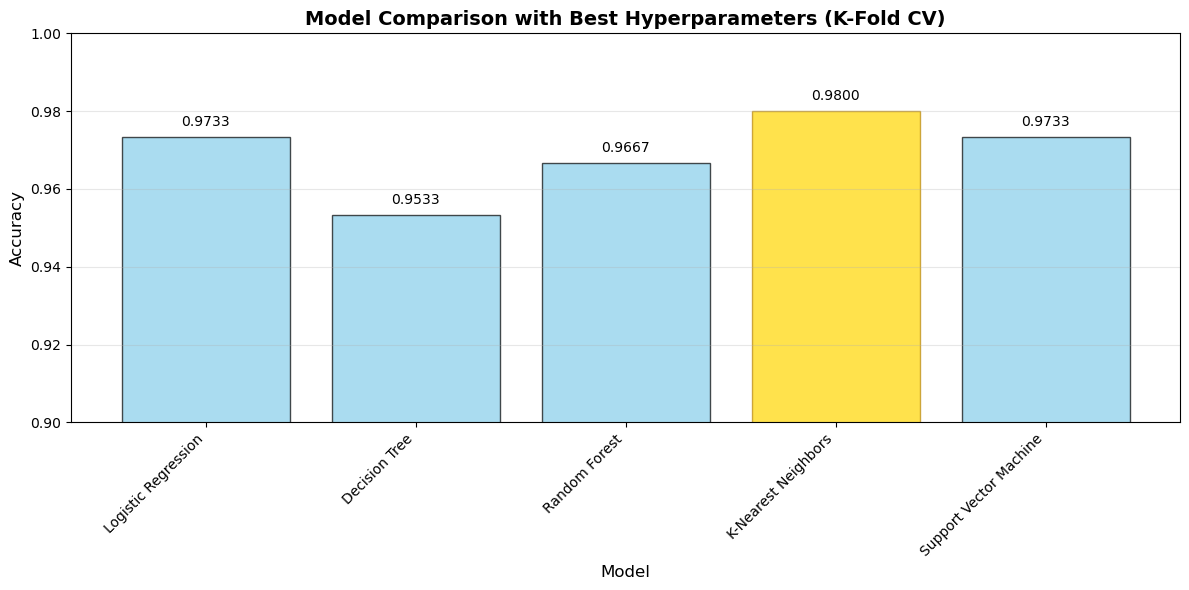


📊 The gold bar represents the best model: K-Nearest Neighbors


In [5]:
# Visualize the comparison
import matplotlib.pyplot as plt
import numpy as np

# Extract data for visualization
model_names = list(best_models.keys())
accuracies = [best_models[name]['best_score'] for name in model_names]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color='skyblue', edgecolor='black', alpha=0.7)

# Color the best model differently
max_idx = accuracies.index(max(accuracies))
bars[max_idx].set_color('gold')
bars[max_idx].set_edgecolor('darkgoldenrod')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison with Best Hyperparameters (K-Fold CV)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.9, 1.0])  # Focus on the relevant range
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (name, acc) in enumerate(zip(model_names, accuracies)):
    plt.text(i, acc + 0.002, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n📊 The gold bar represents the best model: {winner}")